In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# load the dataset as a dataframe using pd
data = pd.read_csv('C:/Users/Anusha/Desktop/ExcelRProjects/dataset/Fraud_check.csv')
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
##As mentioned in the business Converting the Taxable income variable to  Income variable by bucketing.
data.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

In [4]:
##Droping the Taxable income variable
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [5]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [6]:
# Using Label Encoder encode the categorical variables into dummy values
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [7]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [8]:
## Income good = 0,risky = 1

In [9]:
##Splitting the data into featuers and labels
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [10]:
features.head(1)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1


In [11]:
labels.head(5)

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [12]:
labels.unique()

array([0, 1])

In [13]:
labels.value_counts()

0    476
1    124
Name: income, dtype: int64

In [14]:
## Collecting the column names
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

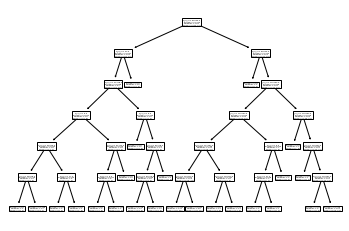

In [18]:
#PLot the decision tree
tree.plot_tree(model);

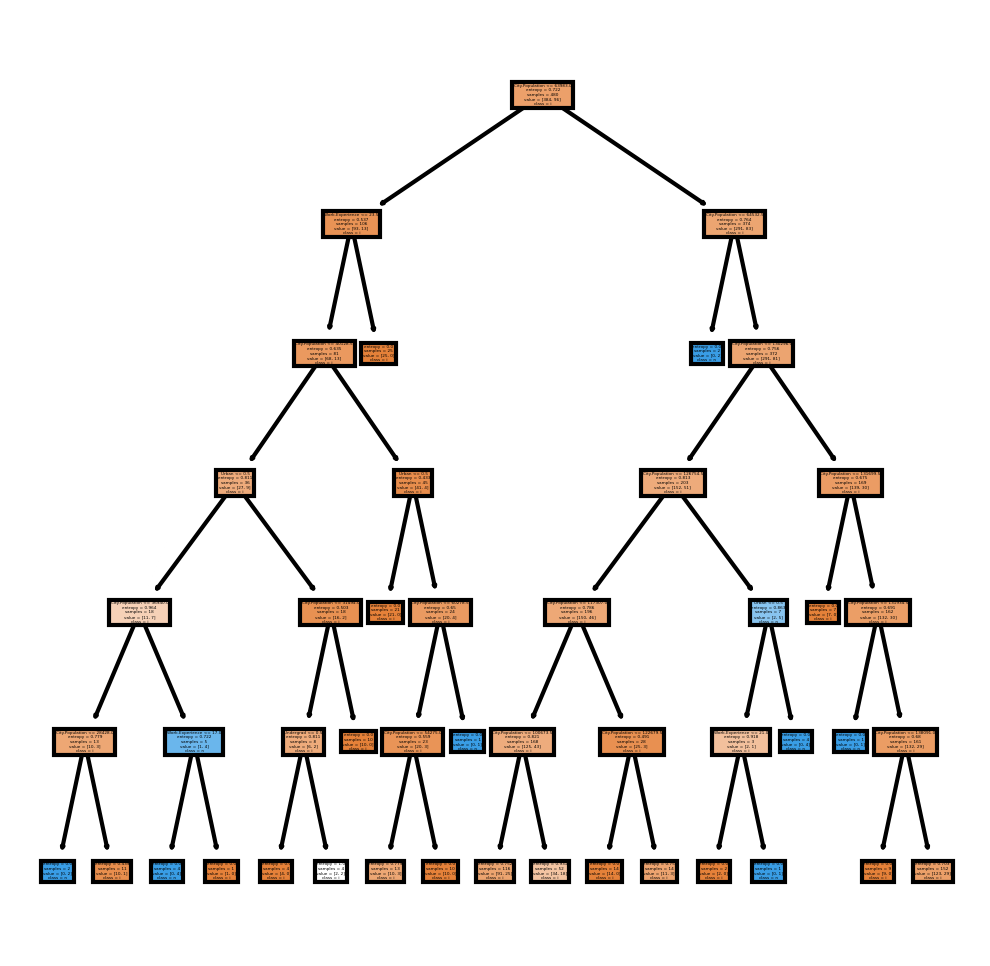

In [19]:
fn = predictors
cn = target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
#Predicting on test data
preds = model.predict(x_train) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    465
1     15
dtype: int64

In [21]:
pd.crosstab(y_train,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
income,,
0,384,0
1,81,15


In [22]:
np.mean(preds==y_train)

0.83125

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    115
1      5
dtype: int64

In [24]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
income,,
0,89,3
1,26,2


In [25]:
np.mean(preds==y_test)

0.7583333333333333

### Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini')

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_train)
np.mean(preds==y_train)

1.0

In [29]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.6416666666666667

#### From The above models we can conclude, for the given dataset decision tree 5.0 is performing better compared to CART